In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

/usr/local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#read main data file
df = pd.read_csv("Cab_Data.csv")

In [3]:
#check for structure
print(df.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [4]:
#check for number of rows
print(len(df.index))

359392


In [5]:
missing_values = df.isna()

In [6]:
print(missing_values)

        Transaction ID  Date of Travel  Company   City  KM Travelled  \
0                False           False    False  False         False   
1                False           False    False  False         False   
2                False           False    False  False         False   
3                False           False    False  False         False   
4                False           False    False  False         False   
...                ...             ...      ...    ...           ...   
359387           False           False    False  False         False   
359388           False           False    False  False         False   
359389           False           False    False  False         False   
359390           False           False    False  False         False   
359391           False           False    False  False         False   

        Price Charged  Cost of Trip  
0               False         False  
1               False         False  
2               False

In [7]:
#fine NaN values by taking the total number
print(df.isna().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


There are no missing values for the Cab_Data file

In [8]:
#repeat for City, Customer ID and Transaction ID data files
df_city = pd.read_csv("City.csv")

In [9]:
print(df_city.head())

             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [10]:
df_customer = pd.read_csv("Customer_ID.csv")

In [11]:
print(df_customer.head())

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [12]:
df_transaction = pd.read_csv("Transaction_ID.csv")

In [13]:
print(df_transaction.sample(20))

        Transaction ID  Customer ID Payment_Mode
144957        10144968        44638         Card
224968        10224979        42599         Card
341375        10341386        59037         Cash
392453        10392464        48902         Cash
416257        10416268         6815         Cash
80303         10080314          983         Card
264994        10265005         2684         Card
141080        10141091        52699         Cash
279978        10279989         6571         Card
360843        10360854        20291         Cash
101546        10101557        12244         Card
23149         10023160         2942         Cash
124201        10124212         4655         Cash
235381        10235392         2809         Cash
30386         10030397         5374         Cash
334761        10334772         2332         Card
58632         10058643        43538         Cash
220405        10220416          966         Cash
311859        10311870        43269         Card
418419        104184

In [14]:
print(df.sample(20))

        Transaction ID  Date of Travel     Company            City  \
233093        10284937           43093    Pink Cab   SACRAMENTO CA   
109263        10133662           42737  Yellow Cab     NEW YORK NY   
323090        10396217           43399    Pink Cab   ORANGE COUNTY   
315828        10387388           43375  Yellow Cab    SAN DIEGO CA   
161724        10199451           42945    Pink Cab  LOS ANGELES CA   
27514         10034897           42510  Yellow Cab  LOS ANGELES CA   
161216        10198943           42937  Yellow Cab  SILICON VALLEY   
213425        10261467           43056  Yellow Cab   WASHINGTON DC   
89310         10110272           42694  Yellow Cab       BOSTON MA   
116275        10142555           42768  Yellow Cab     NEW YORK NY   
294079        10361428           43324  Yellow Cab   WASHINGTON DC   
347390        10425473           43450  Yellow Cab       BOSTON MA   
43081         10054640           42573  Yellow Cab      ATLANTA GA   
285853        103513

In [15]:
print(df_customer.sample(20))

       Customer ID  Gender  Age  Income (USD/Month)
27496        34665  Female   32                8321
25495        10831  Female   30               17245
44495        55988  Female   49               28199
36564        38935    Male   18               12299
7691         42112    Male   22                7161
29054        21711    Male   64               22283
13203        26182  Female   37               16654
19135        14280  Female   39                8842
24583        43308    Male   30               25992
13396        22943    Male   28                8704
10353         6734  Female   21                6219
103           7615    Male   24               17363
35632        10810  Female   48               16391
41232        11795  Female   49               16512
22134        13732    Male   25               21712
26128        24784  Female   27               13385
18692        55913    Male   57               13743
123          11646    Male   32               17133
27920       

In [16]:
print(df_city.sample(20))

                City   Population      Users
15     SACRAMENTO CA     545,776      7,044 
4     SILICON VALLEY   1,177,609     27,247 
0        NEW YORK NY   8,405,837    302,149 
5      ORANGE COUNTY   1,030,185     12,994 
2     LOS ANGELES CA   1,595,037    144,132 
11         AUSTIN TX     698,371     14,978 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
3           MIAMI FL   1,339,155     17,675 
6       SAN DIEGO CA     959,307     69,995 
18      NASHVILLE TN     327,225      9,270 
12        SEATTLE WA     671,238     25,063 
1         CHICAGO IL   1,955,130    164,468 
10         DENVER CO     754,233     12,421 
19         BOSTON MA     248,968     80,021 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
17     WASHINGTON DC     418,859    127,001 
7         PHOENIX AZ     943,999      6,133 
16     PITTSBURGH PA     542,085      3,643 


In [17]:
print(df_customer.isna().sum())

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [18]:
print(df_city.isna().sum())

City          0
Population    0
Users         0
dtype: int64


In [19]:
print(df_transaction.isna().sum())

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


There are no missing values in the City, Customer_ID and Transaction_ID files

In [20]:
#check for duplicate values in each dataset
duplicate_df = df[df.duplicated()]

In [21]:
print(duplicate_df)

Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip]
Index: []


In [22]:
duplicate_df_city = df_city[df_city.duplicated()]

In [23]:
print(duplicate_df_city)

Empty DataFrame
Columns: [City, Population, Users]
Index: []


In [24]:
duplicate_df_customer = df_customer[df_customer.duplicated()]

In [25]:
print(duplicate_df_customer)

Empty DataFrame
Columns: [Customer ID, Gender, Age, Income (USD/Month)]
Index: []


In [26]:
duplicate_df_transaction = df_transaction[df_transaction.duplicated()]

In [27]:
print(duplicate_df_transaction)

Empty DataFrame
Columns: [Transaction ID, Customer ID, Payment_Mode]
Index: []


There are no duplicate values in any of the data files

In [28]:
df_unique_transaction_id = df['Transaction ID'].unique()

In [29]:
print(len(df_unique_transaction_id))

359392


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [31]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [32]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [33]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [34]:
#print unique values of each column, for each dataset, to better understand the data
for i in df.columns:
    print(i, '--', df[i].nunique())

Transaction ID -- 359392
Date of Travel -- 1095
Company -- 2
City -- 19
KM Travelled -- 874
Price Charged -- 99176
Cost of Trip -- 16291


In [35]:
for i in df_city.columns:
    print(i, '--', df_city[i].nunique())

City -- 20
Population -- 20
Users -- 20


In [36]:
for i in df_customer.columns:
    print(i, '--', df_customer[i].nunique())

Customer ID -- 49171
Gender -- 2
Age -- 48
Income (USD/Month) -- 23341


In [37]:
for i in df_transaction.columns:
    print(i, '--', df_transaction[i].nunique())

Transaction ID -- 440098
Customer ID -- 49171
Payment_Mode -- 2


In [38]:
#check which cities correspond across the Cab_Data and City datasets
print(df_city)

                City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 


In [39]:
print(df['City'].unique())

['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


In [40]:
print(df_city['City'].unique())

['NEW YORK NY' 'CHICAGO IL' 'LOS ANGELES CA' 'MIAMI FL' 'SILICON VALLEY'
 'ORANGE COUNTY' 'SAN DIEGO CA' 'PHOENIX AZ' 'DALLAS TX' 'ATLANTA GA'
 'DENVER CO' 'AUSTIN TX' 'SEATTLE WA' 'TUCSON AZ' 'SAN FRANCISCO CA'
 'SACRAMENTO CA' 'PITTSBURGH PA' 'WASHINGTON DC' 'NASHVILLE TN'
 'BOSTON MA']


In [41]:
print(df.loc[df['City'].isin(['San Francisco'])])

Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip]
Index: []


San Francisco is missing from the large dataset

In [42]:
#check data types of each dataset
print(df.dtypes)

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


In [43]:
print(df_city.dtypes)

City          object
Population    object
Users         object
dtype: object


In [44]:
print(df_customer.dtypes)

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


In [45]:
print(df_transaction.dtypes)

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


In [52]:
#'Population' and 'Users' columns in the City dataset are given in the incorrect format, remove the comma and convert to int type
df_city['Population'] = df_city['Population'].str.replace(',','').astype('int')

In [53]:
df_city['Users'] = df_city['Users'].str.replace(',','').astype('int')

In [54]:
print(df_city.dtypes)

City          object
Population     int64
Users          int64
dtype: object


In [55]:
df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [56]:
#create copy of large dataset for master data
df2 = df

In [57]:
#add Earnings/Trip and Margin/Trip 
df2['Earnings/Trip'] = df2['Price Charged'] - df2['Cost of Trip']
df2['Margin/Trip'] = df2['Earnings/Trip']/df2['Price Charged']

In [58]:
df2.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Earnings/Trip,Margin/Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,137.253198,0.271284
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,160.311840,0.185501
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,-220.060000,-0.693015
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,28.012000,0.138559
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,81.962000,0.264303
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,190.030000,0.416120
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,1463.966000,0.762026


In [59]:
#check for smallest age to create age groups
print(df_customer.loc[df_customer['Age'] <25])

       Customer ID  Gender  Age  Income (USD/Month)
3            28020    Male   23               23327
6            33788    Male   23               23788
7            34106    Male   19               19980
10           58774    Male   20               23602
21           57200    Male   23                3268
...            ...     ...  ...                 ...
49156        49888    Male   23                3226
49160        46456    Male   20               30662
49161        46512    Male   20               16996
49164        36141  Female   21               14944
49169        41677    Male   23               19454

[11065 rows x 4 columns]


In [60]:
#function which creates age groups
def ages(a):
    if a >= 65:
        return "Seniors >65 years old"
    elif a >= 45:
        return "45-65 years old"
    elif a >= 35:
        return "35-45 years old"
    elif a >= 25:
        return "25-35 years old"
    else:
        return "Young adults 18-25 years old"

df_customer['Age Category'] = df_customer['Age'].apply(ages)

In [61]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
 4   Age Category        49171 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


In [62]:
df_customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [63]:
#these are to check numbers of customers per different income ranges
#print(df_customer.loc[(df_customer['Income (USD/Month)'] > 20000) & (df_customer['Income (USD/Month)'] < 23000)].count())
print(df_customer.loc[df_customer['Income (USD/Month)'] > 25000].count())

Customer ID           4516
Gender                4516
Age                   4516
Income (USD/Month)    4516
Age Category          4516
dtype: int64


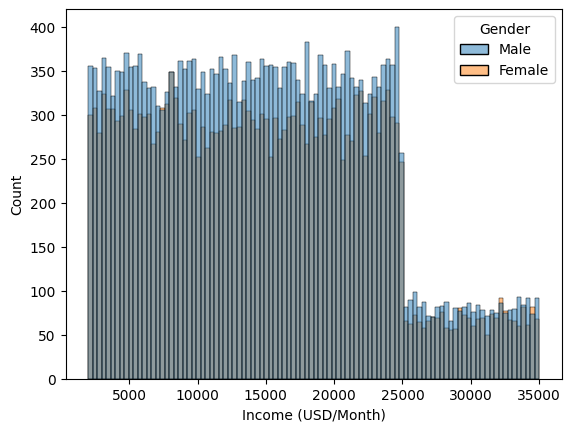

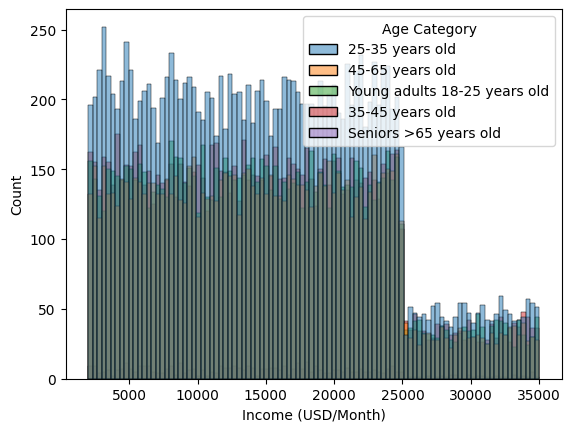

In [64]:
#plots to see if there is a connection between income and gender and income and age
sns.histplot(x = 'Income (USD/Month)', hue = 'Gender', bins = 100, data = df_customer)
plt.show()
sns.histplot(x = 'Income (USD/Month)', hue = 'Age Category', bins = 100, data = df_customer)
plt.show()

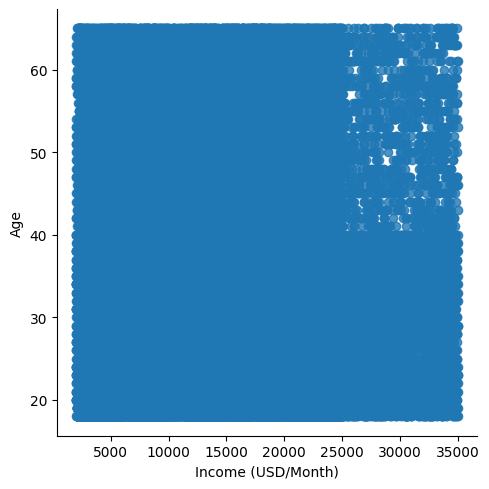

In [65]:
sns.lmplot(x = 'Income (USD/Month)', y = 'Age', data = df_customer, fit_reg = True)

In [67]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

In [66]:
age_income = np.corrcoef(df_customer['Income (USD/Month)'], df_customer['Age'])

In [68]:
print(age_income)

[[1.0000 0.0002]
 [0.0002 1.0000]]


There is no relationship between income and age or income and gender, but the number of users who earn over 25,000 USD decreases dramatically for both companies.

In [69]:
#function to create income categories
def income(inc):
    if inc >= 25000:
        return ">25000"
    elif inc >= 15000:
        return "15000-25000"
    elif inc >= 5000:
        return "5000-15000"
    elif inc >= 3000:
        return "3000-5000"
    else:
        return "2000-3000"

df_customer['Income Category'] = df_customer['Income (USD/Month)'].apply(income)

In [153]:
df_customer.sample(10)

,Customer ID,Gender,Age,Income (USD/Month),Age Category,Income Category
14176,16488,Female,51,6808,45-65 years old,5000-15000
37487,14450,Female,36,2281,35-45 years old,2000-3000
41029,17666,Female,35,14141,35-45 years old,5000-15000
15462,33396,Male,39,18902,35-45 years old,15000-25000
12393,2163,Female,48,16604,45-65 years old,15000-25000
32608,31373,Female,21,2971,Young adults 18-25 years old,2000-3000
39349,46191,Male,42,11667,35-45 years old,5000-15000
39272,38609,Female,50,7623,45-65 years old,5000-15000
23785,9788,Male,33,2278,25-35 years old,2000-3000
9033,59687,Male,31,4723,25-35 years old,3000-5000


In [71]:
#change date format from Excel series to datetime, including information about the day of the week
import xlrd
import datetime as date

In [72]:
#do this by creating a separate variable
xl_date = df['Date of Travel']

In [73]:
xl_date.to_numpy()

array([42377, 42375, 42371, ..., 43105, 43105, 43102])

In [74]:
#this outputs the date and time for single elements (not array)
datetime_date = xlrd.xldate_as_datetime(xl_date[0], 0)

In [75]:
print(datetime_date)

2016-01-08 00:00:00


In [76]:
#keep the date only
date_object = datetime_date.date()

In [77]:
print(type(date_object))

<class 'datetime.date'>


In [78]:
print(date_object)

2016-01-08


In [79]:
#add the day of the week
date_object.strftime("%A %d %B %Y")


'Friday 08 January 2016'

In [80]:
#apply the above to all elements in the xl_date array
dates = [None] * len(xl_date)
for i in range(len(xl_date)):
    datetime_date = xlrd.xldate_as_datetime(xl_date[i], 0)
    date_object = datetime_date.date()
    dates[i] = date_object.strftime("%A %d %B %Y")
    

In [81]:
len(dates)

359392

In [82]:
len(xl_date)

359392

In [83]:
print(dates[1:10])

['Wednesday 06 January 2016', 'Saturday 02 January 2016', 'Thursday 07 January 2016', 'Sunday 03 January 2016', 'Thursday 07 January 2016', 'Sunday 03 January 2016', 'Thursday 07 January 2016', 'Tuesday 12 January 2016', 'Wednesday 06 January 2016']


In [84]:
#replace Excel date series with newly obtained dates
df2['Date of Travel'] = dates

In [85]:
df2.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Earnings/Trip,Margin/Trip
19064,10024158,Sunday 10 April 2016,Pink Cab,NEW YORK NY,33.66,737.93,346.6980,391.2320,0.530175
316242,10388132,Friday 05 October 2018,Yellow Cab,WASHINGTON DC,39.22,769.27,470.6400,298.6300,0.388199
338695,10414726,Saturday 24 November 2018,Yellow Cab,NEW YORK NY,36.75,790.26,515.9700,274.2900,0.347088
267414,10328064,Saturday 12 May 2018,Yellow Cab,NEW YORK NY,12.74,462.80,169.6968,293.1032,0.633326
285882,10351384,Saturday 21 July 2018,Yellow Cab,CHICAGO IL,17.17,256.45,243.1272,13.3228,0.051951


In [86]:
#function to create months groups (all date groups will be necessary to investigate seasonality)
def months(date):
    if "January" in date:
        return "January"
    elif "February" in date:
        return "February"
    elif "March" in date:
        return "March"
    elif "April" in date:
        return "April"
    elif "May" in date:
        return "May"
    elif "June" in date:
        return "June"
    elif "July" in date:
        return "July"
    elif "August" in date:
        return "August"
    elif "September" in date:
        return "September"
    elif "October" in date:
        return "October"
    elif "November" in date:
        return "November"
    else:
        return "December"

df2['Month Of Travel'] = df2['Date of Travel'].apply(months)

In [87]:
df2.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Earnings/Trip,Margin/Trip,Month Of Travel
273236,10335554,Tuesday 29 May 2018,Yellow Cab,WASHINGTON DC,26.22,445.74,352.3968,93.3432,0.209412,May
269741,10331135,Sunday 27 May 2018,Pink Cab,CHICAGO IL,35.70,366.88,357.0000,9.8800,0.026930,May
62946,10078574,Sunday 25 September 2016,Pink Cab,CHICAGO IL,8.19,97.20,95.0040,2.1960,0.022593,September
126802,10155965,Wednesday 22 March 2017,Pink Cab,LOS ANGELES CA,28.60,460.40,311.7400,148.6600,0.322893,March
68242,10085009,Sunday 09 October 2016,Pink Cab,CHICAGO IL,15.21,148.11,155.1420,-7.0320,-0.047478,October


In [88]:
#function to create groups based on the day of the week
def weekday(date):
    if "Monday" in date:
        return "Monday"
    elif "Tuesday" in date:
        return "Tuesday"
    elif "Wednesday" in date:
        return "Wednesday"
    elif "Thursday" in date:
        return "Thursday"
    elif "Friday" in date:
        return "Friday"
    elif "Saturday" in date:
        return "Saturday"
    else:
        return "Sunday"

df2['Week Day Of Travel'] = df2['Date of Travel'].apply(weekday)

In [89]:
df2.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Earnings/Trip,Margin/Trip,Month Of Travel,Week Day Of Travel
216396,10264820,Sunday 19 November 2017,Yellow Cab,NEW YORK NY,9.28,232.46,126.9504,105.5096,0.453883,November,Sunday
202068,10247807,Thursday 26 October 2017,Yellow Cab,NEW YORK NY,36.58,848.48,487.2456,361.2344,0.425743,October,Thursday
9666,10012353,Friday 26 February 2016,Yellow Cab,SEATTLE WA,41.60,641.80,544.1280,97.6720,0.152184,February,Friday
303908,10373111,Monday 10 September 2018,Yellow Cab,NEW YORK NY,26.18,574.73,326.7264,248.0036,0.431513,September,Monday
263650,10323353,Saturday 28 April 2018,Yellow Cab,NEW YORK NY,22.44,637.72,269.2800,368.4400,0.577746,April,Saturday


In [90]:
#function to create year groups
def year(date):
    if "2016" in date:
        return 2016
    elif "2017" in date:
        return 2017
    else:
        return 2018

In [91]:
df2['Year Of Travel'] = df2['Date of Travel'].apply(year)

In [92]:
df2.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Earnings/Trip,Margin/Trip,Month Of Travel,Week Day Of Travel,Year Of Travel
270377,10331991,Tuesday 22 May 2018,Yellow Cab,CHICAGO IL,37.10,563.32,458.5560,104.7640,0.185976,May,Tuesday,2018
271304,10333185,Saturday 26 May 2018,Yellow Cab,SEATTLE WA,26.22,467.20,374.4216,92.7784,0.198584,May,Saturday,2018
239808,10293024,Friday 05 January 2018,Yellow Cab,WASHINGTON DC,4.68,88.44,64.0224,24.4176,0.276092,January,Friday,2018
131932,10162426,Sunday 02 April 2017,Yellow Cab,WASHINGTON DC,10.71,243.37,131.0904,112.2796,0.461353,April,Sunday,2017
61893,10077250,Thursday 15 September 2016,Yellow Cab,NEW YORK NY,3.12,65.16,42.6816,22.4784,0.344972,September,Thursday,2016


In [93]:
print(df2.dtypes)

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Earnings/Trip         float64
Margin/Trip           float64
Month Of Travel        object
Week Day Of Travel     object
Year Of Travel          int64
dtype: object


In [94]:
#function to create quarters
def quarter(date):
    if (("January" in date ) or ("February" in date) or ("March" in date)):
        return "Q1"
    elif (("April" in date) or ("May" in date ) or ("June" in date)):
        return "Q2"
    elif (("July" in date) or ("August" in date) or ("September" in date)):
        return "Q3"
    else:
        return "Q4"
    
df2['Travel Quarter'] = df2['Date of Travel'].apply(quarter)

In [95]:
df2.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Earnings/Trip,Margin/Trip,Month Of Travel,Week Day Of Travel,Year Of Travel,Travel Quarter
217487,10266321,Friday 01 December 2017,Pink Cab,DENVER CO,26.19,478.39,303.804,174.586,0.364945,December,Friday,2017,Q4
228791,10279828,Monday 25 December 2017,Pink Cab,CHICAGO IL,16.05,173.27,168.525,4.745,0.027385,December,Monday,2017,Q4
110074,10134667,Friday 06 January 2017,Yellow Cab,WASHINGTON DC,14.55,236.10,185.076,51.024,0.216112,January,Friday,2017,Q1
285232,10350506,Friday 20 July 2018,Pink Cab,LOS ANGELES CA,44.03,466.82,523.957,-57.137,-0.122396,July,Friday,2018,Q3
25558,10032482,Thursday 12 May 2016,Yellow Cab,CHICAGO IL,20.70,290.74,253.368,37.372,0.128541,May,Thursday,2016,Q2


In [106]:
#start creating master data by merging datasets on common columns; keep all values that don't match by adding NaN values (this is what the outer method of merging does)
df_res = df2.merge(df_city, on = 'City', how = 'outer')

In [107]:
print(df_res.sample(10))

        Transaction ID              Date of Travel     Company  \
224249      10256353.0  Wednesday 08 November 2017  Yellow Cab   
224637      10259875.0   Thursday 16 November 2017  Yellow Cab   
40098       10407636.0     Friday 16 November 2018    Pink Cab   
47257       10036802.0        Thursday 26 May 2016  Yellow Cab   
280557      10080963.0    Sunday 18 September 2016  Yellow Cab   
117535      10069725.0    Friday 02 September 2016    Pink Cab   
88010       10351399.0         Monday 23 July 2018  Yellow Cab   
187370      10095454.0      Sunday 30 October 2016    Pink Cab   
122164      10112931.0     Sunday 04 December 2016    Pink Cab   
117410      10069600.0    Monday 05 September 2016    Pink Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  \
224249     NEW YORK NY         31.68         904.72      444.7872   
224637     NEW YORK NY         42.00        1182.79      604.8000   
40098        BOSTON MA         40.32         560.55      475.7760 

In [108]:
df_res = df_res.merge(df_transaction, on = 'Transaction ID', how = 'outer')

In [109]:
print(df_res.sample(10))

        Transaction ID             Date of Travel     Company            City  \
53498       10086182.0     Sunday 02 October 2016  Yellow Cab      CHICAGO IL   
104052      10329787.0         Sunday 20 May 2018  Yellow Cab       DALLAS TX   
430912      10385504.0                        NaN         NaN             NaN   
153015      10393744.0  Wednesday 17 October 2018  Yellow Cab  LOS ANGELES CA   
337497      10211847.0      Sunday 20 August 2017  Yellow Cab   WASHINGTON DC   
35196       10331092.0       Saturday 26 May 2018    Pink Cab       BOSTON MA   
209094      10195426.0        Sunday 16 July 2017  Yellow Cab     NEW YORK NY   
287437      10226222.0   Friday 22 September 2017    Pink Cab    SAN DIEGO CA   
255182      10394621.0     Monday 22 October 2018  Yellow Cab     NEW YORK NY   
334481      10181302.0        Sunday 04 June 2017  Yellow Cab   WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Earnings/Trip  Margin/Trip  \
53498          18.81       

In [110]:
df_res = df_res.merge(df_customer, on = 'Customer ID', how = 'outer')

In [111]:
print(df_res.sample(10))

        Transaction ID              Date of Travel     Company  \
636         10053948.0       Saturday 16 July 2016    Pink Cab   
94855       10170049.0          Friday 05 May 2017  Yellow Cab   
10049       10240879.0   Wednesday 18 October 2017    Pink Cab   
88622       10060100.0      Tuesday 02 August 2016  Yellow Cab   
375972      10208204.0                         NaN         NaN   
430319      10202993.0                         NaN         NaN   
309668      10078131.0  Saturday 10 September 2016  Yellow Cab   
298727      10319719.0        Friday 13 April 2018  Yellow Cab   
341430      10324715.0          Friday 04 May 2018    Pink Cab   
252614      10029005.0      Saturday 23 April 2016  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  \
636         ATLANTA GA         32.96         534.36      382.3360   
94855       CHICAGO IL         15.54         230.97      212.5872   
10049        AUSTIN TX         34.88         659.60      387.1680 

In [112]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440099 entries, 0 to 440098
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      440098 non-null  float64
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359393 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Earnings/Trip       359392 non-null  float64
 8   Margin/Trip         359392 non-null  float64
 9   Month Of Travel     359392 non-null  object 
 10  Week Day Of Travel  359392 non-null  object 
 11  Year Of Travel      359392 non-null  float64
 12  Travel Quarter      359392 non-null  object 
 13  Population          359393 non-null  float64
 14  Users               359393 non-null  float64
 15  Rate of Use/City    359393 non-nul

In [113]:
#adding a rate of cab users/city to both the City dataset and the dataset that will be turned into the master, although this remains unused for now
df_res['Rate of Use/City']=df_res['Users']/df_res['Population']

In [114]:
df_city['Rate of Use/City']=df_city['Users']/df_city['Population']

In [115]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              20 non-null     object 
 1   Population        20 non-null     int64  
 2   Users             20 non-null     int64  
 3   Rate of Use/City  20 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 768.0+ bytes


In [116]:
print(df_city.sample(10))

              City  Population   Users  Rate of Use/City
10       DENVER CO      754233   12421          0.016468
13       TUCSON AZ      631442    5712          0.009046
11       AUSTIN TX      698371   14978          0.021447
17   WASHINGTON DC      418859  127001          0.303207
4   SILICON VALLEY     1177609   27247          0.023138
2   LOS ANGELES CA     1595037  144132          0.090363
5    ORANGE COUNTY     1030185   12994          0.012613
6     SAN DIEGO CA      959307   69995          0.072964
9       ATLANTA GA      814885   24701          0.030312
12      SEATTLE WA      671238   25063          0.037338


In [118]:
#creating master data by only selecting certain categories: most important are demographic data (age, gender, income), earnings and margin, seasonality (with different types) and length of the journey (km).
master_data = df_res[['Company','Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age Category', 'Income Category', 'Year Of Travel', 'Travel Quarter', 'Month Of Travel', 'Week Day Of Travel', 'City', 'Rate of Use/City','KM Travelled', 'Price Charged', 'Cost of Trip', 'Earnings/Trip', 'Margin/Trip']]

In [119]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440099 entries, 0 to 440098
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   Transaction ID      440098 non-null  float64
 2   Customer ID         440098 non-null  float64
 3   Payment_Mode        440098 non-null  object 
 4   Gender              440098 non-null  object 
 5   Age Category        440098 non-null  object 
 6   Income Category     440098 non-null  object 
 7   Year Of Travel      359392 non-null  float64
 8   Travel Quarter      359392 non-null  object 
 9   Month Of Travel     359392 non-null  object 
 10  Week Day Of Travel  359392 non-null  object 
 11  City                359393 non-null  object 
 12  Rate of Use/City    359393 non-null  float64
 13  KM Travelled        359392 non-null  float64
 14  Price Charged       359392 non-null  float64
 15  Cost of Trip        359392 non-nul

In [155]:
master_data.sample(5)

,Company,Transaction ID,Customer ID,Payment_Mode,Gender,Age Category,Income Category,Year Of Travel,Travel Quarter,Month Of Travel,Week Day Of Travel,City,Rate of Use/City,KM Travelled,Price Charged,Cost of Trip,Earnings/Trip,Margin/Trip
360323,NaN,10136022.0,43536.0,Cash,Male,25-35 years old,15000-25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89833,Pink Cab,10064249.0,3555.0,Cash,Male,35-45 years old,15000-25000,2016.0,Q3,August,Saturday,CHICAGO IL,0.084121,26.00,260.61,309.4000,-48.7900,-0.187215
293371,Yellow Cab,10335205.0,19697.0,Cash,Male,45-65 years old,>25000,2018.0,Q2,June,Saturday,SAN DIEGO CA,0.072964,27.84,517.24,384.1920,133.0480,0.257227
65741,Pink Cab,10240952.0,5866.0,Card,Male,25-35 years old,>25000,2017.0,Q4,October,Saturday,CHICAGO IL,0.084121,29.87,347.74,319.6090,28.1310,0.080897
88941,Yellow Cab,10409093.0,4173.0,Card,Female,25-35 years old,15000-25000,2018.0,Q4,November,Wednesday,CHICAGO IL,0.084121,38.22,551.28,509.0904,42.1896,0.076530


In [121]:
#Starting to look at average earnings/margin per company and other descriptive analyses
metrics = master_data.groupby(['Company'])[['Price Charged', 'Cost of Trip']].mean()

In [122]:
print(metrics)

            Price Charged  Cost of Trip
Company                                
Pink Cab       310.800856    248.148682
Yellow Cab     458.181990    297.922004


In [123]:
Median_usd = ['Price Charged', 'Cost of Trip']

In [124]:
pink_cab = metrics[metrics.index == 'Pink Cab'].values
pink_cab = pink_cab.reshape(-1)
print(pink_cab)


[310.8009 248.1487]


In [125]:
yellow_cab = metrics[metrics.index == 'Yellow Cab'].values
yellow_cab = yellow_cab.reshape(-1)
print(yellow_cab)

[458.1820 297.9220]


In [126]:
x = np.arange(2)

In [127]:
width = 0.3

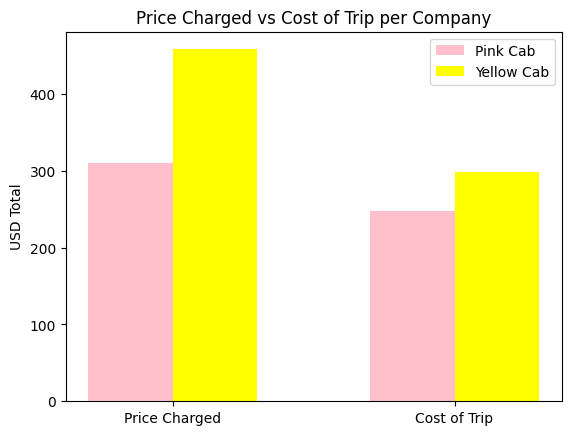

In [128]:
fig, ax = plt.subplots()
ax.bar(x - 0.3/2, pink_cab, width, label = "Pink Cab", color = 'pink')
ax.bar(x + 0.3/2, yellow_cab, width, label = "Yellow Cab", color = 'yellow')
plt.xticks(x, Median_usd)
plt.ylabel('USD Total')
plt.title('Price Charged vs Cost of Trip per Company')
plt.legend()
plt.show()


Yellow Cab charged higher prices for their trips but their trips also costed more (although the ratios between the two companies are not the same across the two measurements); it would be interesting to see why that is - does Yellow Cab take relatively longer journeys compared to Pink Cab? How does this affect the profit vs the revenue?

In [131]:
margins = master_data.groupby(['Company'])[['Earnings/Trip','Margin/Trip']].mean()

In [132]:
print(margins)

            Earnings/Trip  Margin/Trip
Company                               
Pink Cab        62.652174     0.173808
Yellow Cab     160.259986     0.301345


In [133]:
margins = margins.values

In [134]:
print(margins)

[[62.6522 0.1738]
 [160.2600 0.3013]]


In [135]:
print(margins[0,:])

[62.6522 0.1738]


In [136]:
pink_cabm = margins[0,:]
yellow_cabm = margins[1,:]

In [139]:
print(pink_cabm)
print(yellow_cabm)
print('The earnings/trip of yellow cab are ', round(yellow_cabm[0]/pink_cabm[0],2), 'times greater than that of Pink Cab')
print('The margin/trip of yellow cab is ', round(yellow_cabm[1]/pink_cabm[1],2), 'times greater than that of Pink Cab')
#multiply relative margins by 100 to be in the same scale as margin
#pink_cabm[1] = pink_cabm[1]*100
#yellow_cabm[1] = yellow_cabm[1]*100

[62.6522 0.1738]
[160.2600 0.3013]
The earnings/trip of yellow cab are  2.56 times greater than that of Pink Cab
The margin/trip of yellow cab is  1.73 times greater than that of Pink Cab


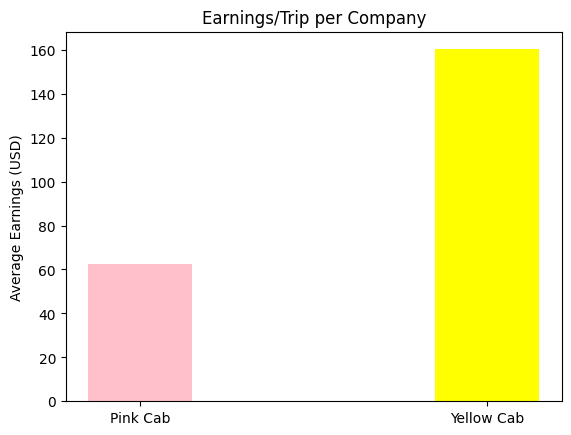

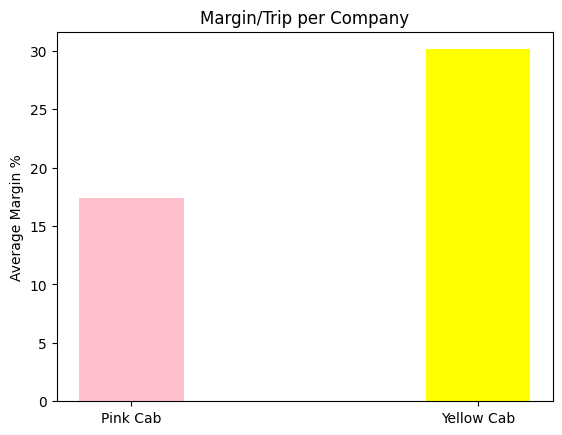

In [273]:
Company = ['Pink Cab', 'Yellow Cab']
fig, ax = plt.subplots()
ax.bar(Company, margins[:,0], width, color = ['pink', 'yellow'])
plt.ylabel('Average Earnings (USD)')
plt.title('Earnings/Trip per Company')
plt.show()

fig, ax = plt.subplots()
ax.bar(Company, margins[:,1]*100, width, color = ['pink', 'yellow'])
plt.ylabel('Average Margin %')
plt.title('Margin/Trip per Company')
plt.show()

Yellow Cab has more earnings and a better margin than Pink Cab, although the margin ratio is smaller between the two companies compared to the earnings.

<AxesSubplot:xlabel='KM Travelled', ylabel='Earnings/Trip'>

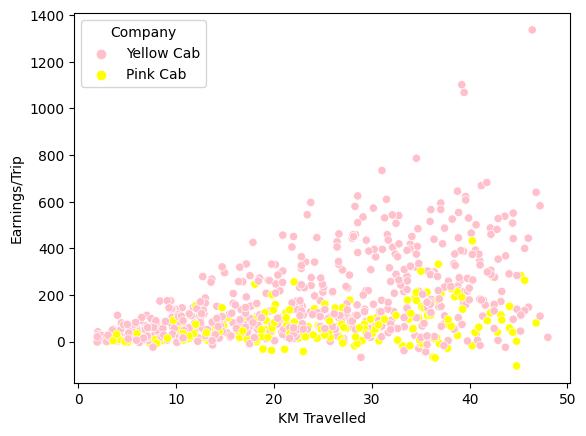

In [276]:
sns.scatterplot(x='KM Travelled', y='Earnings/Trip', data=master_data, hue='Company', palette = ['pink', 'yellow'])
#sns.scatterplot(x='KM Travelled', y='Earnings/Trip', data=master_data.sample(1000), hue='Company', palette = ['pink', 'yellow']) 

<AxesSubplot:xlabel='KM Travelled', ylabel='Margin/Trip'>

/usr/local/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


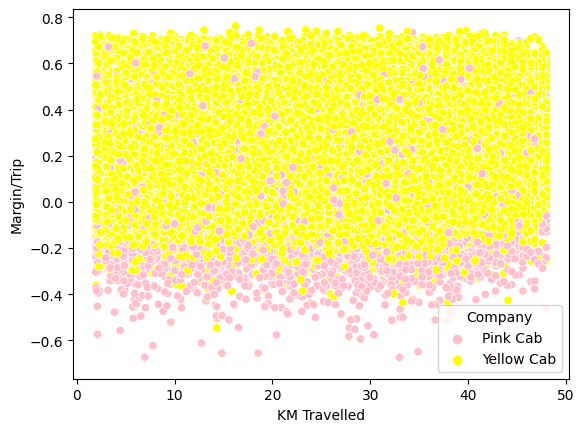

In [232]:
sns.scatterplot(x='KM Travelled', y='Margin/Trip', data=master_data, hue='Company', palette = ['pink', 'yellow']) 

Yellow Cab has a stronger positive trend between the km travelled and the margin/trip (aside from the total number of trips which is greater for Yellow Cab) than Pink Cab. Pink Cab also makes noticeably more negative margins/trip, which indicates potential issues with the business model.

In [172]:
#let's see how demographics affect each company's profitability, whether one company caters for a particular demographic group, etc

age_data = master_data.groupby(['Company', 'Age Category'])['Age Category'].count()
income_data = master_data.groupby(['Company', 'Income Category'])['Income Category'].count()
gender_data = master_data.groupby(['Company', 'Gender'])['Gender'].count()

In [173]:
print(age_data)
print(income_data)
print(gender_data)

Company     Age Category                
Pink Cab    25-35 years old                 27072
            35-45 years old                 19270
            45-65 years old                 18242
            Seniors >65 years old             821
            Young adults 18-25 years old    19306
Yellow Cab  25-35 years old                 87760
            35-45 years old                 63035
            45-65 years old                 59263
            Seniors >65 years old            2558
            Young adults 18-25 years old    62065
Name: Age Category, dtype: int64
Company     Income Category
Pink Cab    15000-25000         33654
            2000-3000            3321
            3000-5000            6792
            5000-15000          33141
            >25000               7803
Yellow Cab  15000-25000        108961
            2000-3000           10682
            3000-5000           21646
            5000-15000         108286
            >25000              25106
Name: Income Categ

In [177]:
age_data.values

array([27072, 19270, 18242,   821, 19306, 87760, 63035, 59263,  2558,
       62065])

<AxesSubplot:title={'center':'Age Category per Company'}, xlabel='Age Category', ylabel='Total Number'>

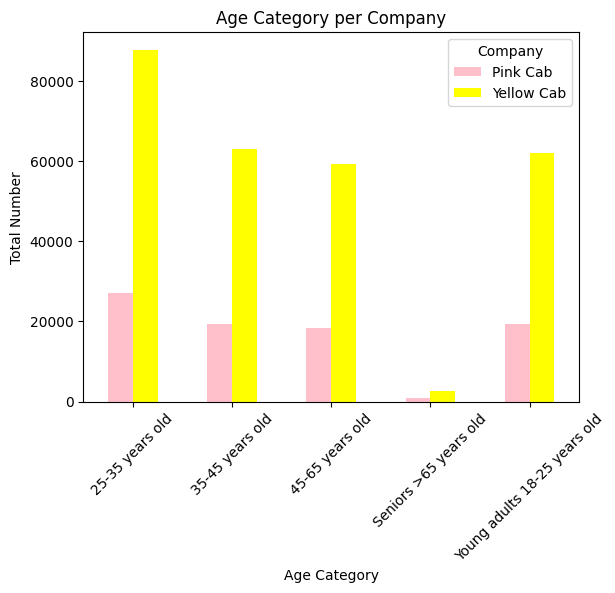

In [211]:
master_data.groupby(['Age Category', 'Company'])['Age Category'].count()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Total Number', title = 'Age Category per Company')

While both companies seem to attract mostly young people and seniors are the least frequent users, there are no noticeable differences in age trends for the two companies.

<AxesSubplot:title={'center':'Income Category per Company'}, xlabel='Income Category', ylabel='Total Number'>

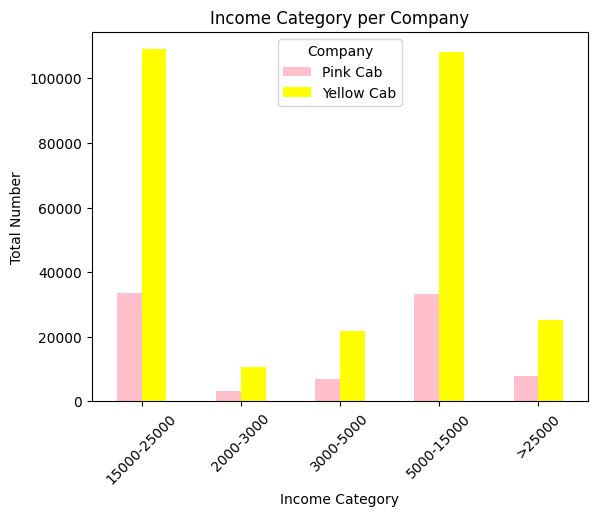

In [212]:
master_data.groupby(['Income Category', 'Company'])['Income Category'].count()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Total Number', title = 'Income Category per Company')

Similarly, people with incomes over 5000 USD per month seem to use both companies more, but the trends between the two companies are the same.

<AxesSubplot:title={'center':'Gender Count per Company'}, xlabel='Gender', ylabel='Total Number'>

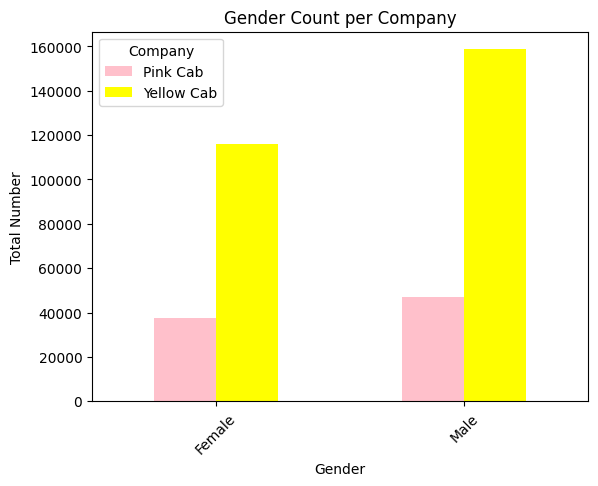

In [213]:
master_data.groupby(['Gender', 'Company'])['Gender'].count()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Total Number', title = 'Gender Count per Company')

Again the total number of users is higher for Yellow Cab, but there is no difference between the two companies between the genders.

<AxesSubplot:title={'center':'Mean Earnings per Age Category per Company'}, xlabel='Age Category', ylabel='Earnings per Trip (USD)'>

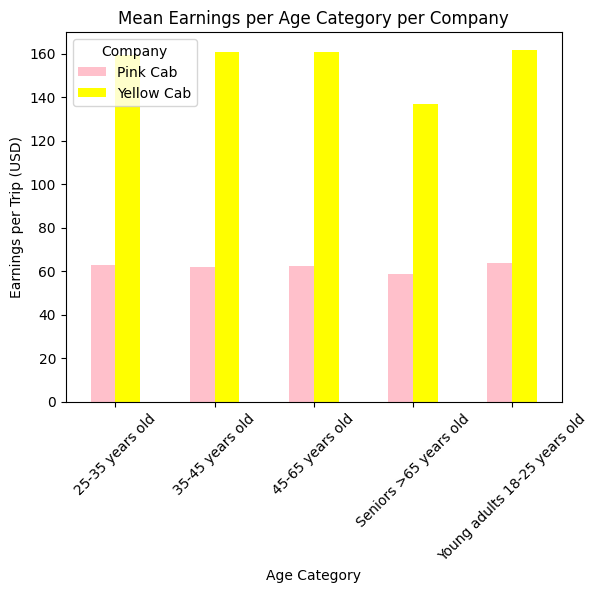

In [214]:
master_data.groupby(['Age Category', 'Company'])['Earnings/Trip'].mean()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Earnings per Trip (USD)', title = 'Mean Earnings per Age Category per Company')

<AxesSubplot:title={'center':'Mean Earnings per Income Category per Company'}, xlabel='Income Category', ylabel='Earnings/Trip (USD)'>

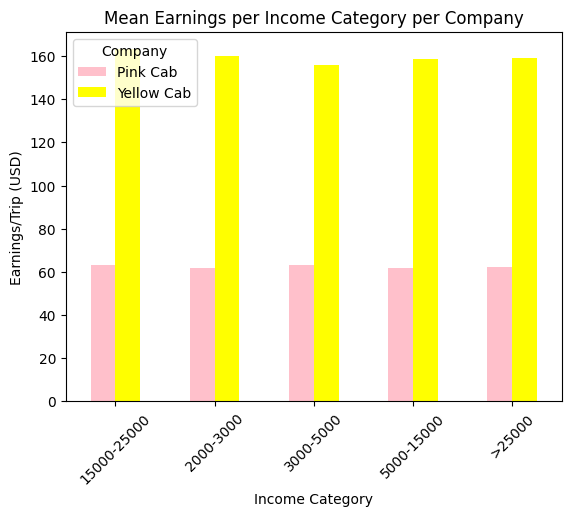

In [215]:
master_data.groupby(['Income Category', 'Company'])['Earnings/Trip'].mean()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Earnings/Trip (USD)', title = 'Mean Earnings per Income Category per Company')

<AxesSubplot:title={'center':'Mean Earnings per Gender Category per Company'}, xlabel='Gender', ylabel='Earnings/Trip (USD)'>

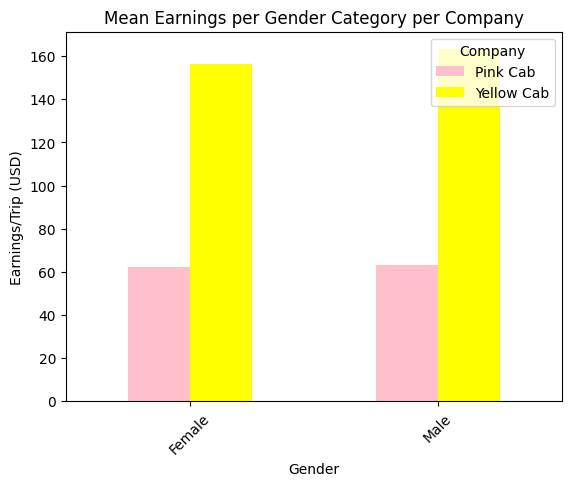

In [216]:
master_data.groupby(['Gender', 'Company'])['Earnings/Trip'].mean()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Earnings/Trip (USD)', title = 'Mean Earnings per Gender Category per Company')

Equally, no demographic group contributes more to either of the two companies' profit.

<AxesSubplot:title={'center':'Mean Margin/Trip per City per Company'}, xlabel='City', ylabel='Margin/Trip'>

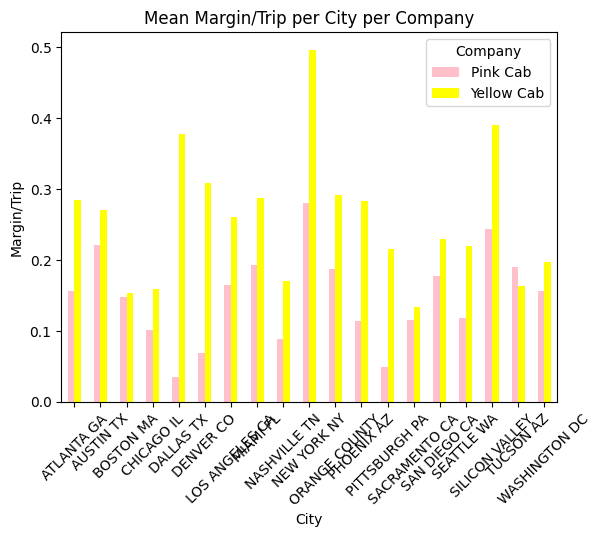

In [236]:
#city data
master_data.groupby(['City', 'Company'])['Margin/Trip'].mean()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Margin/Trip', title = 'Mean Margin/Trip per City per Company')

<AxesSubplot:title={'center':'Mean Rate of Use/City'}, xlabel='City', ylabel='Rate of Use/City'>

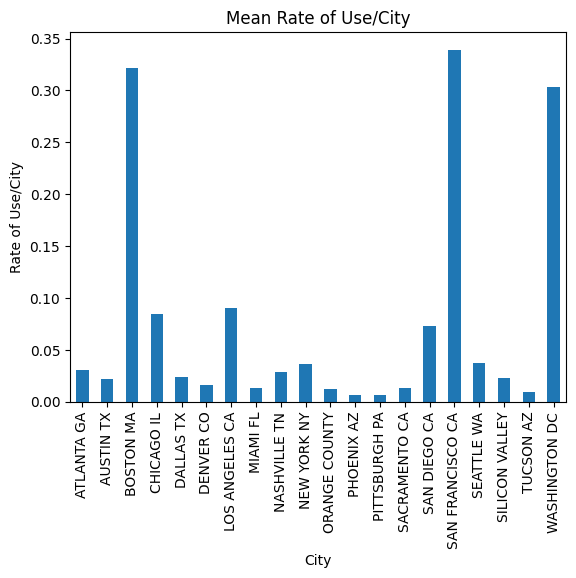

In [237]:
df_city.groupby(['City'])['Rate of Use/City'].mean()\
.sort_index()\
.plot(kind = 'bar', ylabel = 'Rate of Use/City', title = 'Mean Rate of Use/City')

<AxesSubplot:title={'center':'Total Presence/City per Company'}, xlabel='City', ylabel='Presence in each City'>

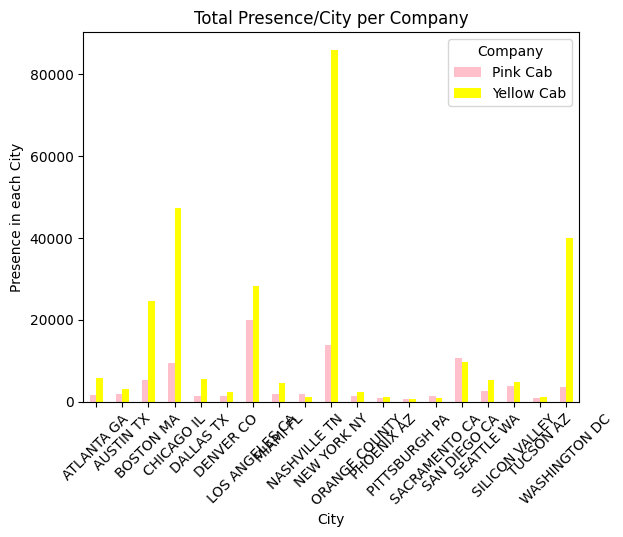

In [242]:
master_data.groupby(['City', 'Company'])['City'].count()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Presence in each City', title = 'Total Presence/City per Company')

<AxesSubplot:title={'center':'Total Population of each City'}, xlabel='City'>

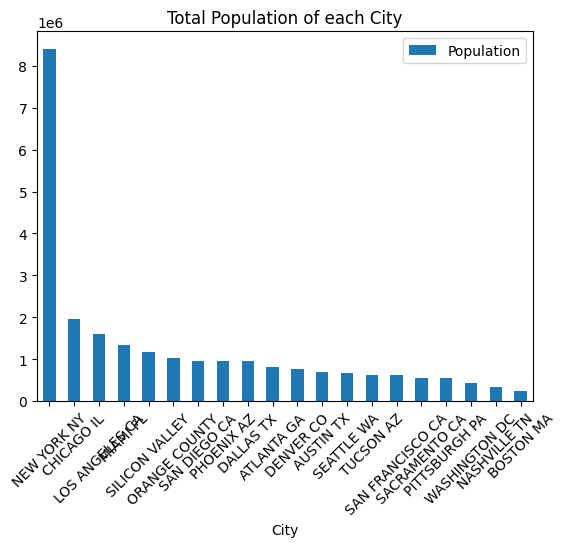

In [251]:
df_city.plot(kind = 'bar', x = 'City', y = 'Population', rot = 45, title='Total Population of each City')

Yellow Cab succeeds at having a larger profit and presence in smaller cities, as well as in cities where Pink Cab does very poorly (such as Chicago and Orange County). It would be interesting to investigate city effects further.

In [256]:
vip_clients = master_data.loc[master_data['Price Charged'] > master_data['Price Charged'].mean() + 2*master_data['Price Charged'].std()]

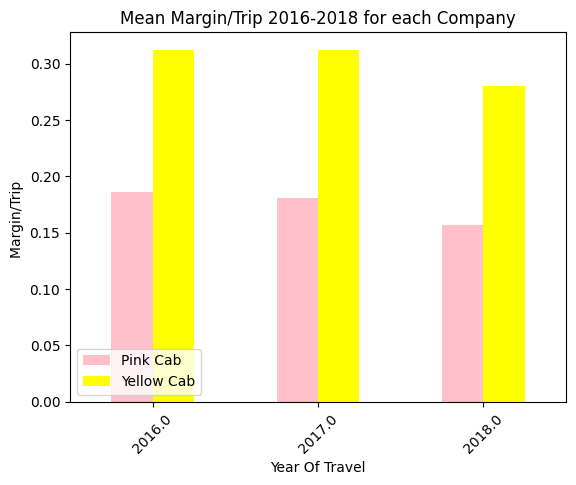

In [268]:
master_data.groupby(['Year Of Travel', 'Company'])['Margin/Trip'].mean()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Margin/Trip ', title = 'Mean Margin/Trip 2016-2018 for each Company')
plt.legend(loc = 3)

<AxesSubplot:title={'center':'Mean Margin/Trip per Quarter for each Company'}, xlabel='Travel Quarter', ylabel='Margin/Trip '>

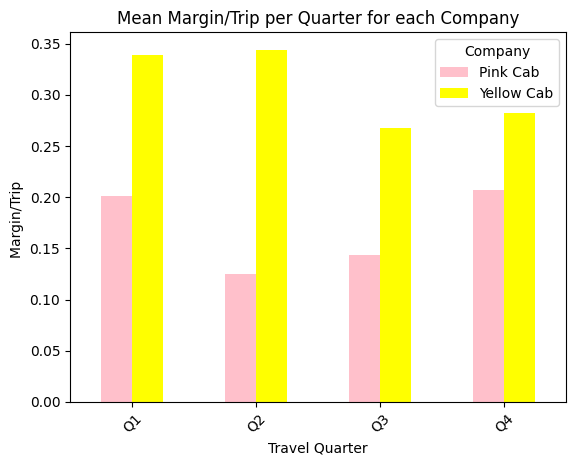

In [263]:
master_data.groupby(['Travel Quarter', 'Company'])['Margin/Trip'].mean()\
.sort_index()\
.unstack()\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Margin/Trip ', title = 'Mean Margin/Trip per Quarter for each Company')

<AxesSubplot:title={'center':'Mean Margin/Trip per month for each Company'}, xlabel='Month Of Travel', ylabel='Margin/Trip '>

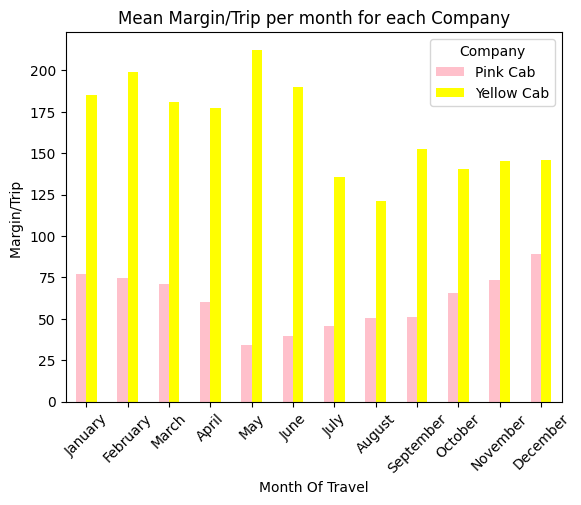

In [280]:
master_data.groupby(['Month Of Travel', 'Company'])['Earnings/Trip'].mean()\
.sort_index()\
.unstack()\
.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Margin/Trip ', title = 'Mean Margin/Trip per month for each Company')

<AxesSubplot:title={'center':'Mean Margin/Trip per Weekday for each Company'}, xlabel='Week Day Of Travel', ylabel='Margin/Trip '>

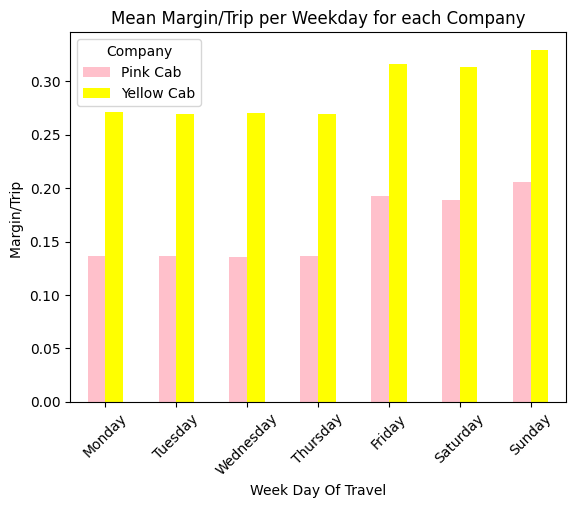

In [282]:
master_data.groupby(['Week Day Of Travel', 'Company'])['Margin/Trip'].mean()\
.sort_index()\
.unstack()\
.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\
.plot(kind = 'bar', rot = 45, color = ['pink', 'yellow'], ylabel = 'Margin/Trip ', title = 'Mean Margin/Trip per Weekday for each Company')

Seasonality effects are the same for both companies in terms of year and days of the week, but they are different in terms of quarter and months. Yellow Cab has higher margins in the first two quarters, as well as in warmer months such as May (although there is an increase in the colder months of January and February for both companies). However, Pink Cab shows margin peaks in December and quarters 1 and 4, but these drop in Q3 and the months of May, June and July. It would be interesting to investigate how and why weather aspects may influence these trends. 